In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
annotation_file_path = "/Users/h6x/ORNL/git/modeling-ideas/overdose modeling for entire country/data/processed data/svi with hepvu/2018/annotation 2018/annotation_NOD.csv"

In [25]:
data = pd.read_csv(annotation_file_path,dtype={'STCNTY': str} )

In [26]:
data.head()

,STCNTY,percentile,NOD
0,01001,2,0.161264
1,01003,3,0.193679
2,01005,0,0.115073
3,01007,4,0.260130
4,01009,4,0.234198


array([[<Axes: title={'center': 'NOD'}>]], dtype=object)

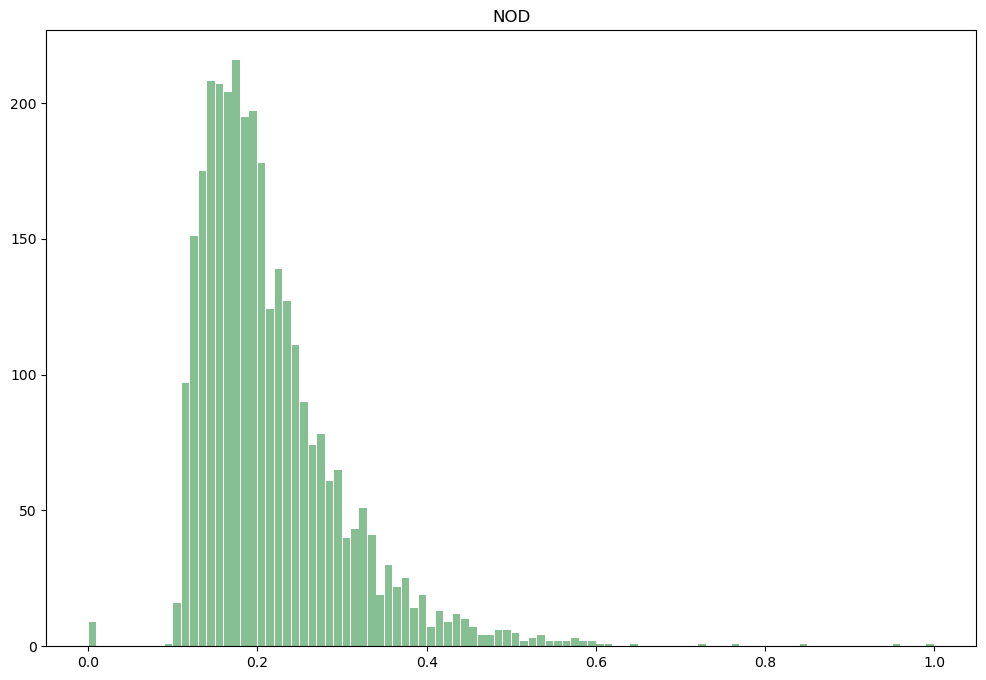

In [27]:
#plot a histogram of the data
data.hist(column='NOD', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


In [28]:
# log transform the data without negative and plot the histogram
data['NODLOG'] = np.log(data['NOD'])


/Users/h6x/anaconda3/envs/pytorch/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
# drop - inf values
data = data[data['NODLOG'] != -np.inf]

In [32]:
data

,STCNTY,percentile,NOD,NODLOG
0,01001,2,0.161264,-1.824711
1,01003,3,0.193679,-1.641553
2,01005,0,0.115073,-2.162189
3,01007,4,0.260130,-1.346575
4,01009,4,0.234198,-1.451590
...,...,...,...,...
3135,56037,4,0.226094,-1.486804
3136,56039,0,0.147488,-1.914010
3137,56041,4,0.233387,-1.455056
3138,56043,4,0.230956,-1.465527


array([[<Axes: title={'center': 'NODLOG'}>]], dtype=object)

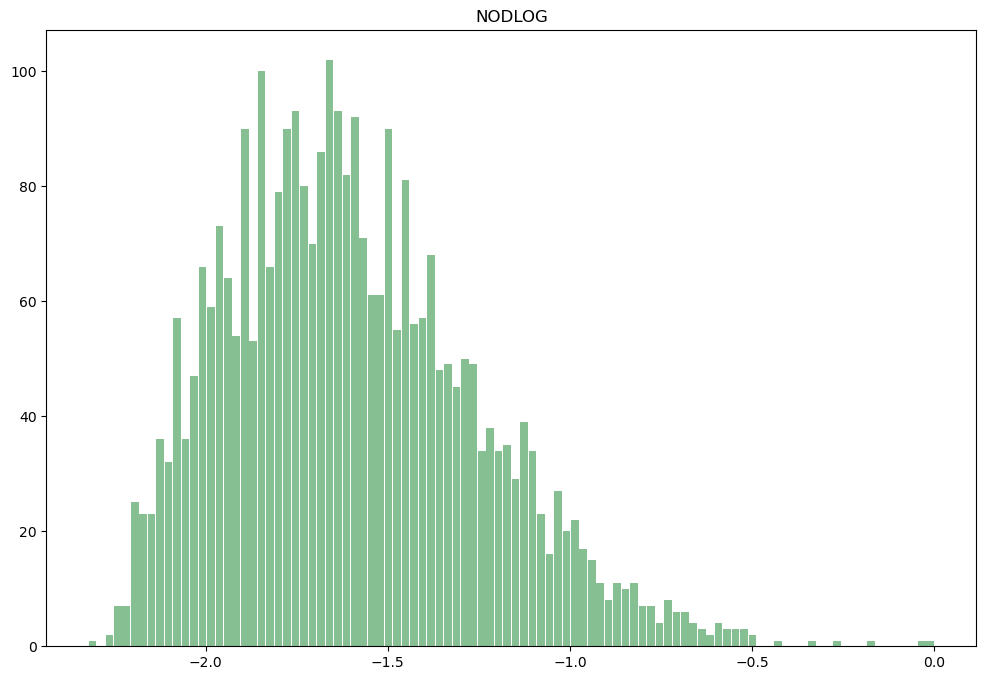

In [33]:
data.hist(column='NODLOG', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


In [34]:
df = data.__deepcopy__()

In [35]:
# Sample data creation
np.random.seed(0)

# Step 1: Create bins using pd.cut
df['bins'] = pd.cut(df['NOD'], bins=100)

# Step 2: Group by the bins
grouped = df.groupby('bins')

# Step 3: Sample 10 data points or less from each bin
sampled_df_list = [group.sample(n=min(len(group), 10), random_state=1) for name, group in grouped]

# Step 4: Concatenate the sampled data points into a new DataFrame
sampled_df = pd.concat(sampled_df_list).reset_index(drop=True)

# Display the result
print(sampled_df)

    STCNTY  percentile       NOD    NODLOG             bins
0    19167           0  0.098055 -2.322226  (0.0972, 0.107]
1    48427           0  0.106159 -2.242819  (0.0972, 0.107]
2    46067           0  0.105348 -2.250482  (0.0972, 0.107]
3    31003           0  0.106969 -2.235214  (0.0972, 0.107]
4    19089           0  0.106159 -2.242819  (0.0972, 0.107]
..     ...         ...       ...       ...              ...
443  35039           4  0.721232 -0.326795    (0.72, 0.729]
444  54047           4  0.762561 -0.271073   (0.756, 0.765]
445  54005           4  0.840357 -0.173929   (0.838, 0.847]
446  24510           4  0.954619 -0.046443   (0.946, 0.955]
447  54011           4  1.000000  0.000000     (0.991, 1.0]

[448 rows x 5 columns]


array([[<Axes: title={'center': 'NOD'}>]], dtype=object)

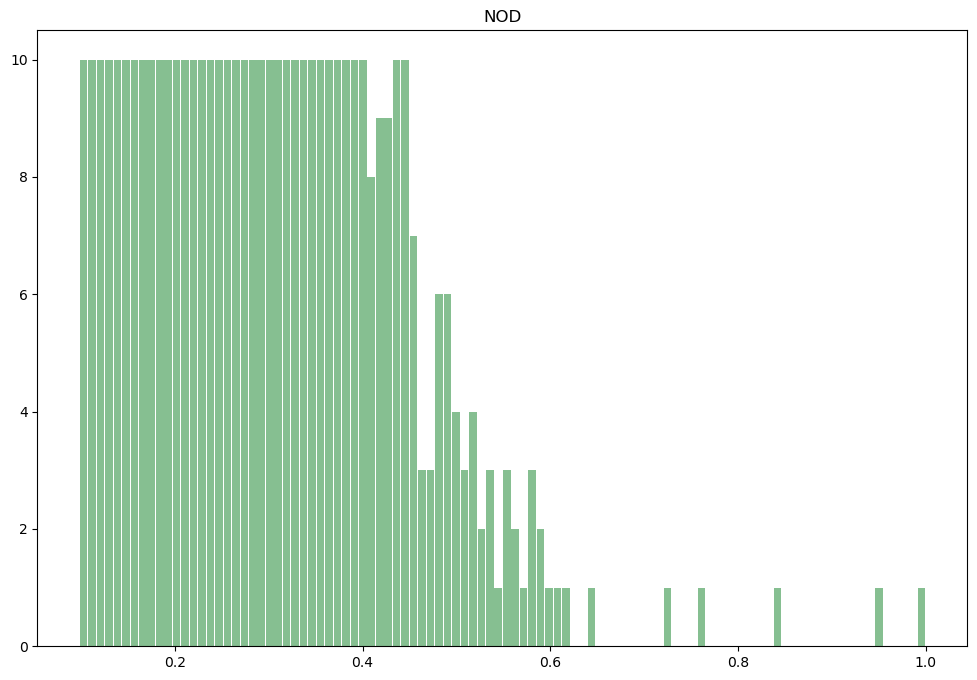

In [36]:
# plot the sampled data
sampled_df.hist(column='NOD', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [37]:
# save as a csv file
sampled_df.to_csv('/Users/h6x/ORNL/git/modeling-ideas/overdose modeling for entire country/data/processed data/svi with hepvu/2018/annotation 2018/annotation_NOD_sample_10.csv', index=False)